In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [14]:
main_data = pd.read_csv('phishing_dts.csv')

In [15]:
main_data.head()

,FILENAME,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,521848.txt,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,...,0,0,1,34,20,28,119,0,124,1
1,31372.txt,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,...,0,0,1,50,9,8,39,0,217,1
2,597387.txt,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,...,0,0,1,10,2,7,42,2,5,1
3,554095.txt,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,...,1,1,1,3,27,15,22,1,31,1
4,151578.txt,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,...,1,0,1,244,15,34,72,1,85,1


In [16]:
main_data.columns

Index(['FILENAME', 'URL', 'URLLength', 'Domain', 'DomainLength', 'IsDomainIP',
       'TLD', 'URLSimilarityIndex', 'CharContinuationRate',
       'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain',
       'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio',
       'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL',
       'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL',
       'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL',
       'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength',
       'HasTitle', 'Title', 'DomainTitleMatchScore', 'URLTitleMatchScore',
       'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect',
       'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame',
       'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton',
       'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto',
       'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef',
       'NoOfEmptyRef', 'NoOf

In [17]:
main_data.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [18]:
# Check target variable distribution
label_counts = main_data['label'].value_counts()
label_counts

label
1    134850
0    100945
Name: count, dtype: int64

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/4196252078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


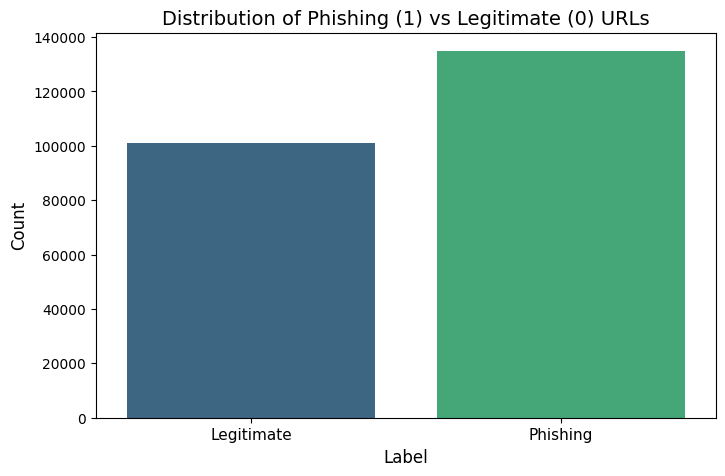

In [19]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.title("Distribution of Phishing (1) vs Legitimate (0) URLs", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

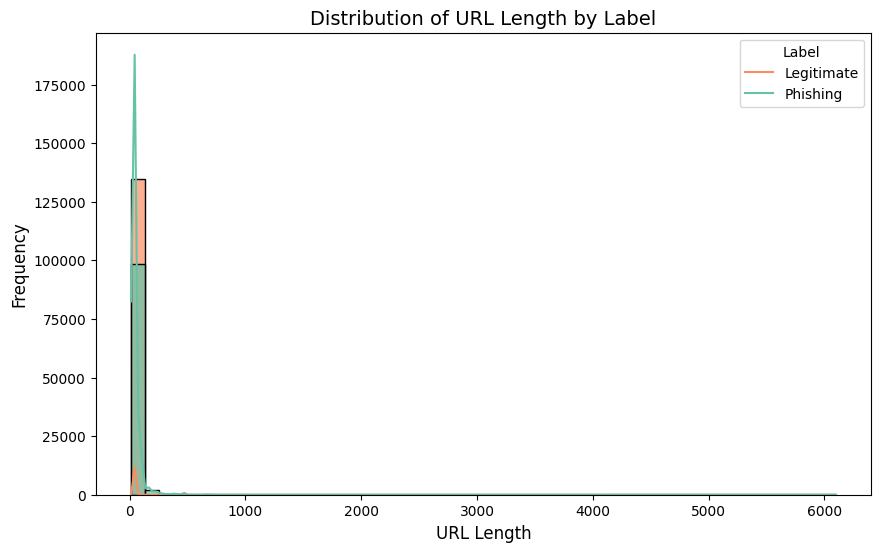

In [20]:
# URL Length distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=main_data, x='URLLength', hue='label', kde=True, bins=50, palette='Set2', alpha=0.7)
plt.title("Distribution of URL Length by Label", fontsize=14)
plt.xlabel("URL Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

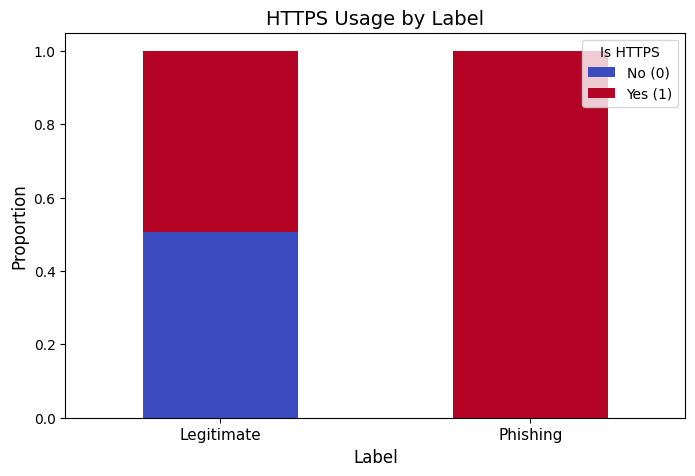

In [21]:
# HTTPS usage by label
https_counts = main_data.groupby('label')['IsHTTPS'].value_counts(normalize=True).unstack()

# Plot HTTPS usage
https_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='coolwarm')
plt.title("HTTPS Usage by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], rotation=0, fontsize=11)
plt.legend(title="Is HTTPS", labels=["No (0)", "Yes (1)"], loc='upper right')
plt.show()

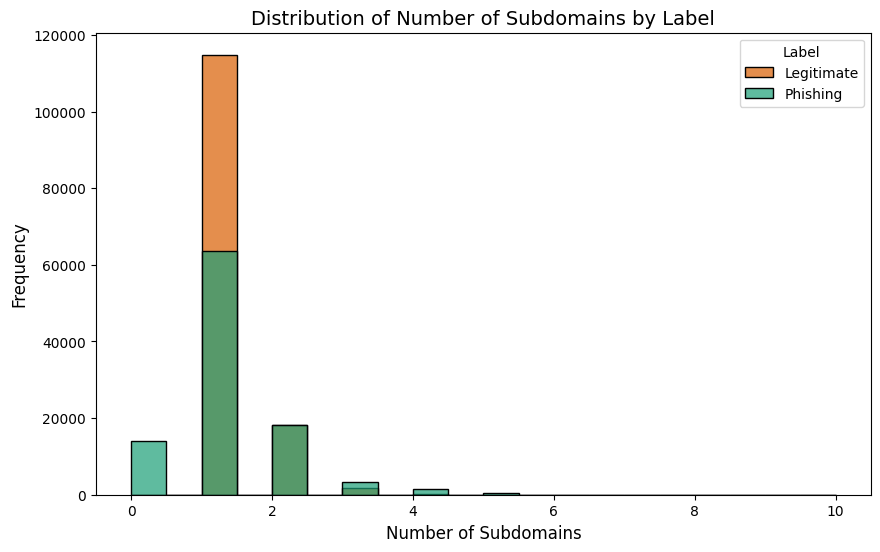

In [22]:
# Number of Subdomains by label
plt.figure(figsize=(10, 6))
sns.histplot(data=main_data, x='NoOfSubDomain', hue='label', kde=False, bins=20, palette='Dark2', alpha=0.7)
plt.title("Distribution of Number of Subdomains by Label", fontsize=14)
plt.xlabel("Number of Subdomains", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/3271877361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_data, x='label', y='SpacialCharRatioInURL', palette='muted')


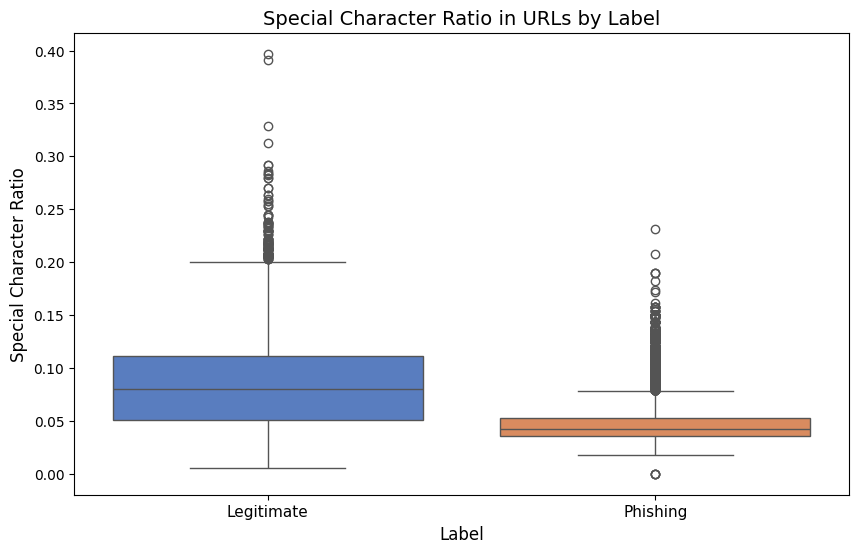

In [23]:
# Special Character Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='SpacialCharRatioInURL', palette='muted')
plt.title("Special Character Ratio in URLs by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Special Character Ratio", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/1090956321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_data, x='label', y='NoOfImage', palette='Set1')


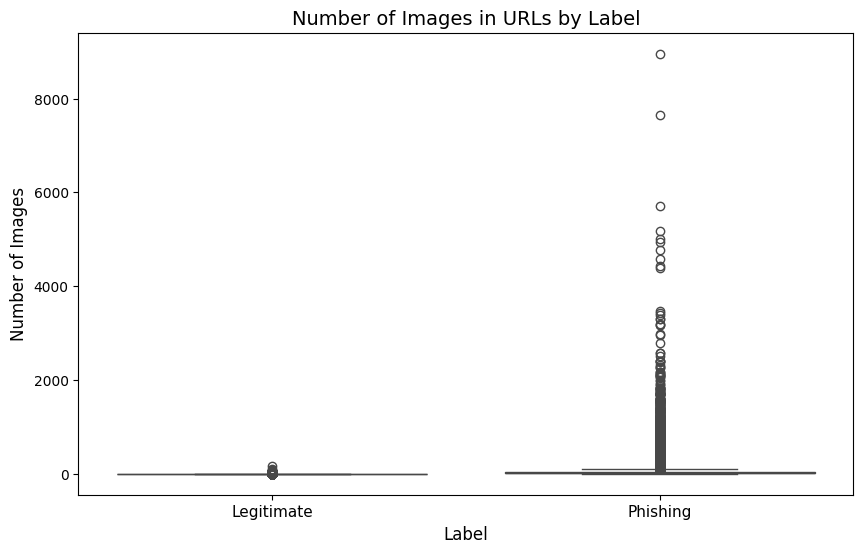

In [24]:
# Number of images by label
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='NoOfImage', palette='Set1')
plt.title("Number of Images in URLs by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

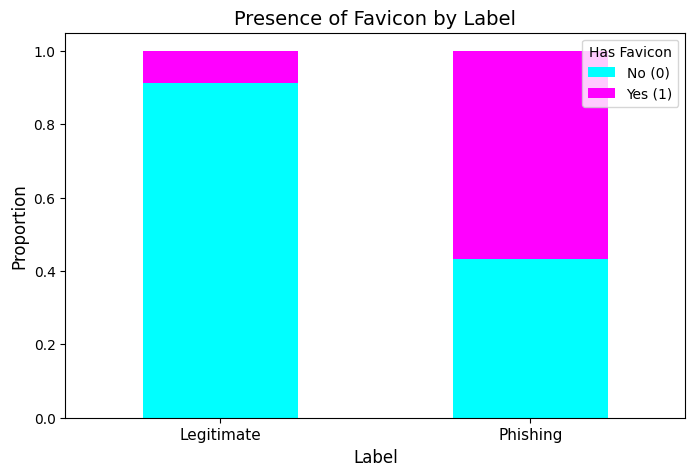

In [25]:
# Favicon analysis
favicon_counts = main_data.groupby('label')['HasFavicon'].value_counts(normalize=True).unstack()
favicon_counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='cool')
plt.title("Presence of Favicon by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Proportion", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], rotation=0, fontsize=11)
plt.legend(title="Has Favicon", labels=["No (0)", "Yes (1)"], loc='upper right')
plt.show()

In [74]:
numerical_cols = main_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = main_data.select_dtypes(include=['object']).columns.tolist()

# Perform correlation on numerical data only
correlation_matrix = main_data[numerical_cols].corr()
correlation_matrix.shape

(52, 52)

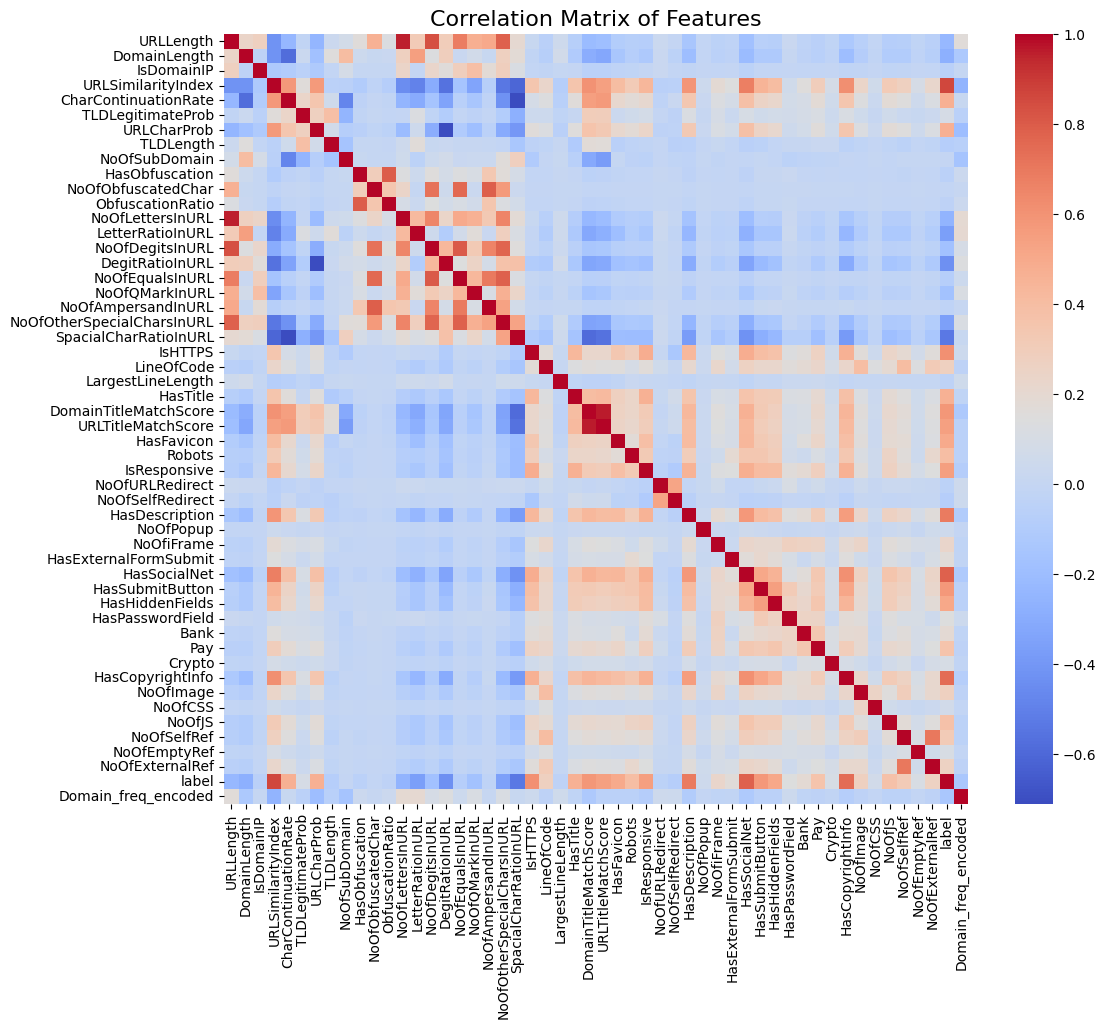

In [75]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, cbar=True)
plt.title("Correlation Matrix of Features", fontsize=16)
plt.show()

In [78]:
# Top correlations with the target variable (label)
correlations_with_label = correlation_matrix['label'].sort_values(ascending=False)
top_positive_correlations = correlations_with_label.head(10)
top_negative_correlations = correlations_with_label.tail(10)


print('Top Positive Correlations: ', top_positive_correlations)
print('Top Negative CorrelationsL ', top_negative_correlations)

Top Positive Correlations:  label                    1.000000
URLSimilarityIndex       0.860358
HasSocialNet             0.784255
HasCopyrightInfo         0.743358
HasDescription           0.690232
IsHTTPS                  0.609132
DomainTitleMatchScore    0.584905
HasSubmitButton          0.578561
IsResponsive             0.548608
URLTitleMatchScore       0.539419
Name: label, dtype: float64
Top Negative CorrelationsL  Domain_freq_encoded          -0.139833
NoOfQMarkInURL               -0.175621
NoOfDegitsInURL              -0.177980
URLLength                    -0.233445
NoOfLettersInURL             -0.258090
DomainLength                 -0.283152
NoOfOtherSpecialCharsInURL   -0.358891
LetterRatioInURL             -0.367794
DegitRatioInURL              -0.432032
SpacialCharRatioInURL        -0.533537
Name: label, dtype: float64


/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/906469056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_data, x='label', y='URLLength', palette='Set2')


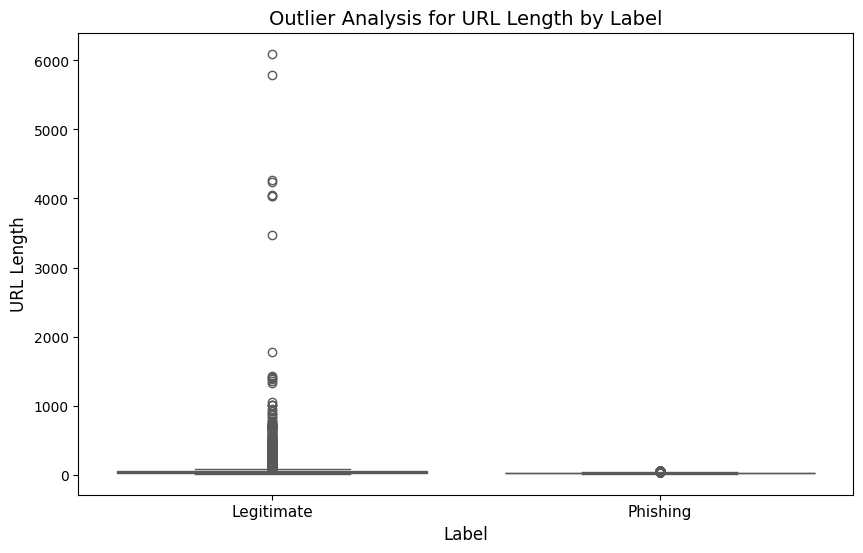

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/906469056.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_data, x='label', y='NoOfSubDomain', palette='Set3')


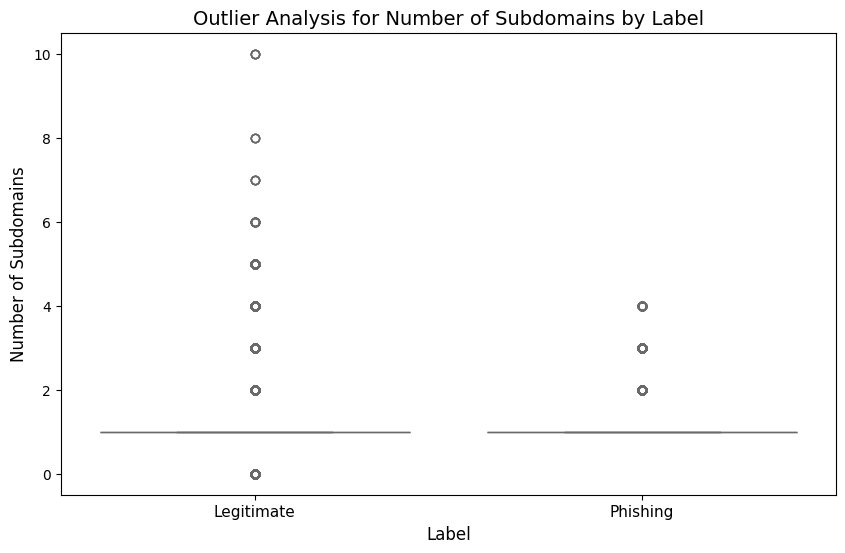

In [79]:
# Outlier Analysis - URL Length
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='URLLength', palette='Set2')
plt.title("Outlier Analysis for URL Length by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("URL Length", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

# Outlier Analysis - Number of Subdomains
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='NoOfSubDomain', palette='Set3')
plt.title("Outlier Analysis for Number of Subdomains by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Number of Subdomains", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2196/1289039712.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=main_data, x='label', y='SpacialCharRatioInURL', palette='muted')


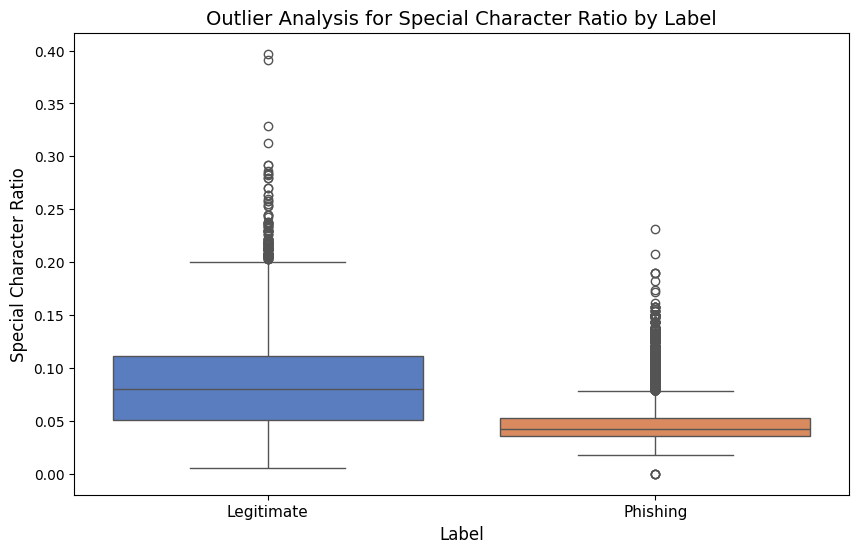

In [29]:
# Outlier Analysis - Special Character Ratio
plt.figure(figsize=(10, 6))
sns.boxplot(data=main_data, x='label', y='SpacialCharRatioInURL', palette='muted')
plt.title("Outlier Analysis for Special Character Ratio by Label", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Special Character Ratio", fontsize=12)
plt.xticks([0, 1], ['Legitimate', 'Phishing'], fontsize=11)
plt.show()

Dimensionality Reduction

In [76]:
if 'label' in numerical_cols:
    numerical_cols.remove('label')

In [30]:
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['URLLength', 'DomainLength', 'IsDomainIP', 'URLSimilarityIndex', 'CharContinuationRate', 'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 'HasObfuscation', 'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 'IsHTTPS', 'LineOfCode', 'LargestLineLength', 'HasTitle', 'DomainTitleMatchScore', 'URLTitleMatchScore', 'HasFavicon', 'Robots', 'IsResponsive', 'NoOfURLRedirect', 'NoOfSelfRedirect', 'HasDescription', 'NoOfPopup', 'NoOfiFrame', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 'NoOfEmptyRef', 'NoOfExternalRef', 'label']
Categorical Columns: ['FILENAME', 'URL', 'Domain', 'TLD', 'Title']


In [32]:
domain_counts = main_data['Domain'].value_counts()
main_data['Domain_freq_encoded'] = main_data['Domain'].map(domain_counts)

# One-Hot Encoding for 'TLD'
# We will use ColumnTransformer to handle this within a pipeline

# Update categorical columns list
categorical_cols = ['TLD']

# Step 4: Define Preprocessing for Numerical and Categorical Data
# Numerical data: Standard Scaling
# Categorical data: One-Hot Encoding

# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [47]:
# Correctly separate features and target variable
X = main_data.drop(['label'], axis=1, errors='ignore')  # Drop target column
y = main_data['label']  # Target variable

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, [col for col in numerical_cols if col in X.columns]),
        ('cat', categorical_transformer, [col for col in categorical_cols if col in X.columns])
    ],
    remainder='drop'  # Drop other columns not listed
)

In [60]:
pca = PCA(n_components=10) # Use a fixed number of components instead of 0.95

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', pca)
])

In [61]:
X_transformed = pipeline.fit_transform(X)

print("Original Features:", X.shape[1])
print("Reduced Features after PCA:", X_transformed.shape[1])

Original Features: 56
Reduced Features after PCA: 10


In [62]:
# Explained Variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance by each principal component:\n", explained_variance)
print("Cumulative Explained Variance:\n", cumulative_variance)

Explained Variance by each principal component:
 [0.18106371 0.09850853 0.05423785 0.04193998 0.03691608 0.03583582
 0.03140788 0.02934518 0.02724146 0.02437079]
Cumulative Explained Variance:
 [0.18106371 0.27957224 0.33381008 0.37575007 0.41266615 0.44850197
 0.47990985 0.50925502 0.53649649 0.56086727]


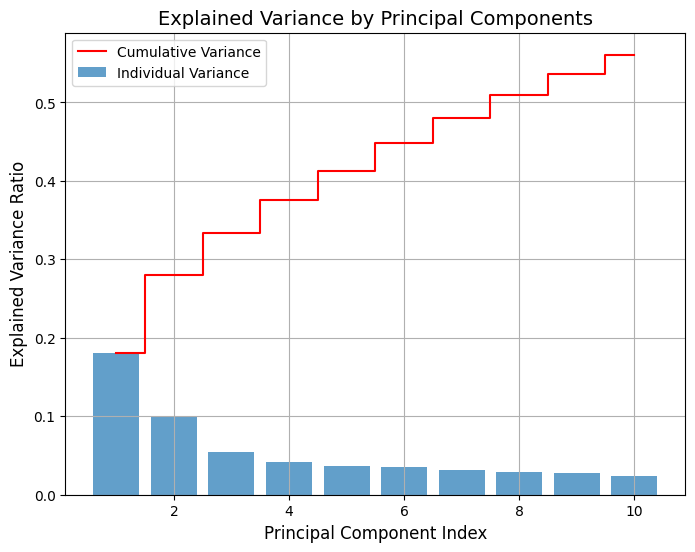

In [63]:
# Plot the variance explained by each component
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label='Individual Variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Cumulative Variance', color='red')
plt.xlabel('Principal Component Index', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)
plt.title('Explained Variance by Principal Components', fontsize=14)
plt.legend()
plt.grid()
plt.show()

Logistic Regression

In [81]:
# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y)


In [82]:
# Step 2: Initialize and train the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = logreg.predict(X_test)

In [84]:
# Step 4: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [85]:
# Output results
print("Logistic Regression Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Logistic Regression Accuracy: 0.9964093357271095

Confusion Matrix:
 [[30120   164]
 [   90 40365]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     30284
           1       1.00      1.00      1.00     40455

    accuracy                           1.00     70739
   macro avg       1.00      1.00      1.00     70739
weighted avg       1.00      1.00      1.00     70739



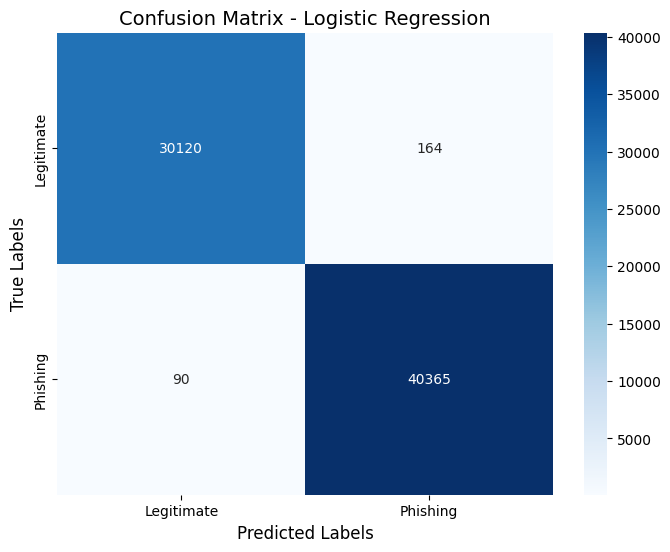

In [87]:
# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('True Labels', fontsize=12)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14)
plt.show()